# Scatter Plots

We go through most of the examples from [http://www.ncl.ucar.edu/Applications/scatter.shtml]. 

Scatter plots are one of the fundamental kinds of charts. They are pretty easy to make in NCL, and very easy to make with python and matplotlib. 

Most of what is demonstrated here is less about the scatter plot itself than about customizing the markers or adding other kinds of decorations. We also have two examples below where we fit a curve to some data (linear and polynomial). There's also a rolling average example, examples of putting markers on a map or using a polar plot, and a demonstration of how to bin data. We also see how to add errorbars (pretty trivial with matplotlib, compared to NCL), and how to color the axis background and add grid lines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# generating random data is almost exactly the same as NCL
np.random.seed([36484749, 9494848])
t = np.random.chisquare(2.0, 50)

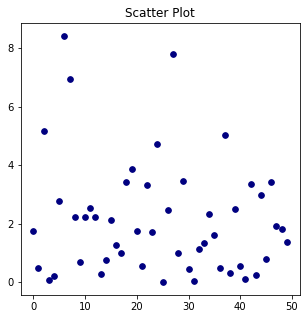

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Scatter Plot")
markerSize = 32
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]
# s is size
# c is color
ax.scatter(np.arange(50), t, s=markerSize, color='navy')

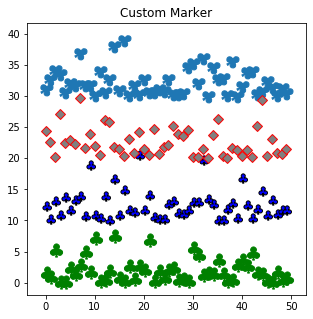

In [34]:
# Custom markers... keep adding a vertical offset as we go through:

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Custom Marker")
markerSize = 200
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]
# s is size
# c is color
ax.scatter(np.arange(50), t, s=markerSize, color='g', marker='$\clubsuit$')

# You can also use `plot` and just say to use markers; note the difference in size though.
t2 = np.random.chisquare(2.0, 50) + 10
mstyle = {'linestyle':'none', 'markersize':10, 'mfc':'blue', 'mec':'black'}
ax.plot(np.arange(50), t2, marker='$\clubsuit$', **mstyle)

# if you want to rotate the custom marker like in NCL
# Using a polygon
t3 = np.random.chisquare(2.0, 50) + 20
mstyle = {'linestyle':'none', 'markersize':10, 'mfc':'gray', 'mec':'red'}
ax.plot(np.arange(50), t3, marker=(4, 0, np.radians(45)), **mstyle)  # marker=(number_of_sides, style, rotation) [https://matplotlib.org/api/markers_api.html]

# with some arbitrary string as the marker, make use of MarkerStyle:
import matplotlib as mpl
m = mpl.markers.MarkerStyle(marker="$\clubsuit$")
m._transform = m.get_transform().rotate_deg(-60)
t4 = np.random.chisquare(2.0, 50) + 30
ax.scatter(np.arange(50), t4, marker=m, s=markerSize)

# ax.set_ylim([0, 35])  # NCL examples shows how to clip the markers; here we show that they are automatically clipped. Might be interesting to try to figure out how to NOT clip them.

In [38]:
# Markers on a map
# follows scatter_3.ncl
import xarray as xr

ds = xr.open_dataset('/Users/brianpm/Documents/www.ncl.ucar.edu/95031800_sao.cdf')
lat = ds['lat']
lon = ds['lon']

# There are some stations with lat/lon values outside range, so
# set these to missing.

lat = lat.where(np.abs(lat) < 90)
lon = lon.where(np.abs(lon) < 180)


In [46]:
import cartopy
import cartopy.crs as ccrs

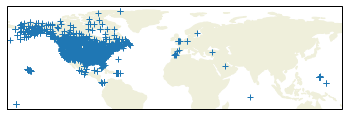

In [48]:

tiMainString = "Locations of stations"
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(lon, lat, linestyle='none', marker='+', transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)

Text(0.5, 1.0, 'Locations of stations')

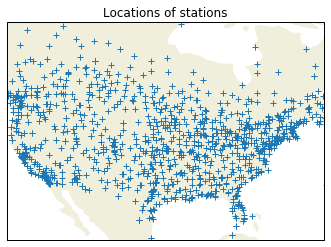

In [50]:
# zoom in on map
mpMaxLatF =   60.
mpMaxLonF =  -65.
mpMinLatF =   22.
mpMinLonF = -125.
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(lon, lat, linestyle='none', marker='+', transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.set_extent([mpMinLonF, mpMaxLonF, mpMinLatF, mpMaxLatF])
ax.set_title(tiMainString)

/Users/brianpm/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


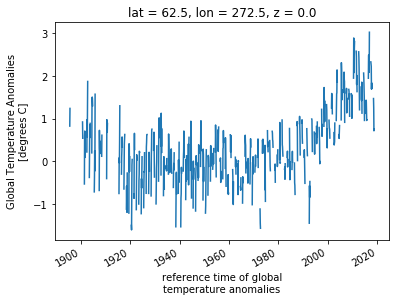

In [56]:
# scatter_4.ncl
# Scatter plot with a regression line

# I couldn't find b003_TS_200-299.nc, so I'll just use some
# other data.
f_input = xr.open_dataset("/Users/brianpm/Dropbox/Data/NOAAGlobalTemp_v5.0.0_gridded_s188001_e201906_c20190710T133355.nc") 
ts = f_input['anom'].sel(lat=60, lon=360-90, method='nearest').squeeze()  # extract time series at 60N,90W

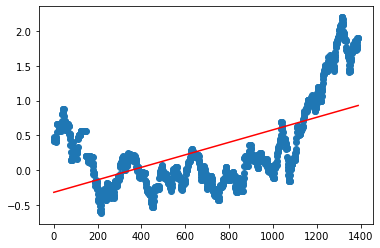

In [85]:
# Smooth data so that seasonal cycle is less 
# prominent. This is for demo purposes only 
# so that the regression line is more sloped.
ts_sm = ts.rolling(time=40, min_periods=5).mean() # min_periods is how many valid data are required to get an output value

# Create x and calculate the regression coefficient.
ts_sm_nm = ts_sm[np.where(~np.isnan(ts_sm))]  # remove the missing values
x = np.arange(len(ts_sm_nm))
rc = np.polyfit(x, ts_sm_nm, 1)

# y = mx+b 
# m is the slope: rc[0] returned from polyfit
# b is the y intercept: rc[1]
yc = rc[0]*x + rc[1]

 
#  res                     = True                   ; plot mods desired
#  res@gsnMaximize         = True                   ; maximize plot in frame
#  res@xyMarkLineModes     = (/"Markers","Lines"/)  ; choose which have markers
#  res@xyMarkers           = 16                     ; choose type of marker 
#  res@xyMarkerColor       = "red"                  ; Marker color
#  res@xyMarkerSizeF       = 0.005                  ; Marker size (default 0.01)
#  res@xyDashPatterns      = 1                      ; solid line 
#  res@xyLineThicknesses   = (/1,2/)                ; set second line to 2

#  res@tiMainString        = "Output from regline"  ; title

#  plot  = gsn_csm_xy (wks,ts&time,data,res)        ; create plot
fig, ax = plt.subplots()
ax.scatter(x, ts_sm_nm)
ax.plot(x, yc, color='red')

In [95]:
# scatter_5.ncl
npts   = 300
data1d = np.random.normal(10.,3.,npts)
# ncl has `nice_mnmxintvl` ... I don't think there is an obvious equivalent,
# just set some levels
levels = np.linspace(data1d.min(), data1d.max(), 10)
print(f"min/max data = {np.min(data1d)} / {np.max(data1d)}")
print(f"Levels start at {levels[0]}, end at {levels[-1]}, with a sapcing of {levels[1]-levels[0]}")
pts_per_level = np.digitize(data1d, levels)


min/max data = 1.957563247878202 / 17.339260952471403
Levels start at 1.957563247878202, end at 17.339260952471403, with a sapcing of 1.7090775227325778


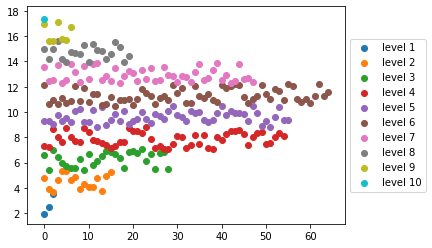

In [109]:
fig, ax = plt.subplots()
for i in range(1,11):
    group_data = data1d[pts_per_level == i]
    ax.scatter(np.arange(len(group_data)), group_data, label=f"level {i}")
# Shrink current axis by 5%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# the colors are changed automatically; we could specify them as in the NCL example.

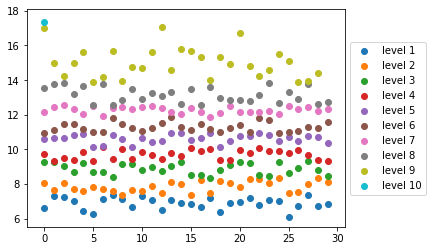

In [114]:
# I think the NCL example was saying that it was setting the levels so about 10% of the data is in each level;
# we can do that with:

pct_levels = np.percentile(data1d, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
pct_pts = np.digitize(data1d, pct_levels)

fig, ax = plt.subplots()
for i in range(1,11):
    group_data = data1d[pct_pts == i]
    ax.scatter(np.arange(len(group_data)), group_data, label=f"level {i}")
# Shrink current axis by 5%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



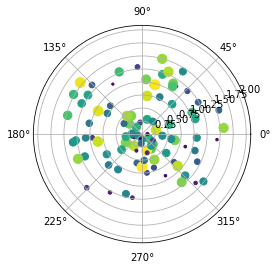

In [126]:
# scatter_6.ncl

npts = 100
latposition = np.random.uniform(low=5, high=90, size=npts)
lonposition = np.random.uniform(low=-180, high=180, size=npts)
dvals = np.random.uniform(low=0, high=100, size=npts)

levels = np.linspace(10, 100, 10)

fig, ax = plt.subplots(subplot_kw={"projection":'polar'})
ax.scatter(np.radians(lonposition), np.radians(latposition), c=dvals, s=dvals)

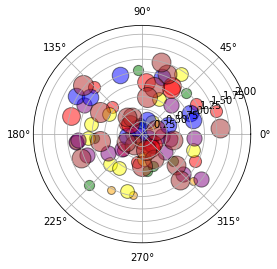

In [137]:
# More like the NCL one, divide into "levels" that are each a color
dvals_levels = np.digitize(dvals, levels)
fig, ax = plt.subplots(subplot_kw={"projection":'polar'})
colors = ["limegreen","orange","green","red","yellow","purple","blue","red","brown","firebrick","skyblue"]
sizes = np.linspace(20, 400, 10)
for i in range(1,10):
    xx = lonposition[dvals_levels == i]
    yy = latposition[dvals_levels == i]
    dd = dvals[dvals_levels == i]
    ax.scatter(np.radians(xx), np.radians(yy), c=colors[i], s=sizes[i], alpha=0.5, edgecolors='black')

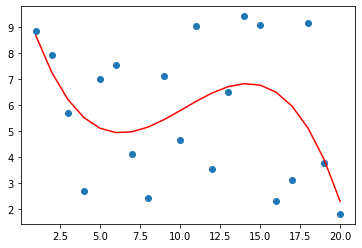

In [151]:
# scatter_9.ncl

# fit a 3rd order polynomial to some random data
nx = 20
x = np.arange(1,nx+1,1)
y = np.random.uniform(low=1, high=10, size=nx)
# calculate coefficients for polynomial fit
rc = np.polyfit(x, y, 3)
yc = rc[0]*x**3 + rc[1]*x**2 + rc[2]*x + rc[3]

fig, ax = plt.subplots()
ax.plot(x, y, marker='o', linestyle='none')
ax.plot(x, yc, color='red')

<ErrorbarContainer object of 3 artists>

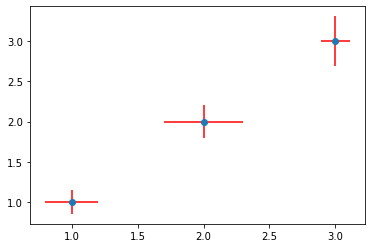

In [156]:
# scatter_12.ncl
# Draw error bars
x      = [1.,2.,3.]
y      = [1.,2.,3.]          
u1     = [0.2,0.3,0.11]         
u2     = [0.15,0.21,0.31]    
fig, ax = plt.subplots()
ax.errorbar(x, y, marker='o', yerr=u2, xerr=u1, linestyle='none', ecolor='red' )

<ErrorbarContainer object of 3 artists>

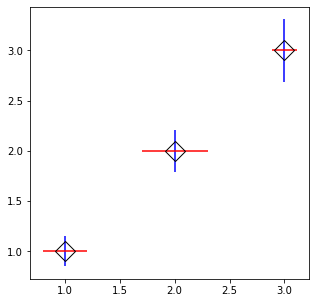

In [172]:
# if you really want the colors like in NCL example

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y, marker='D', markersize=14, mec='k', mfc='none', linestyle='none')
ax.errorbar(x, y, yerr=u2, xerr=None, linestyle='none', ecolor='blue' )
ax.errorbar(x, y, yerr=None, xerr=u1, linestyle='none', ecolor='red')

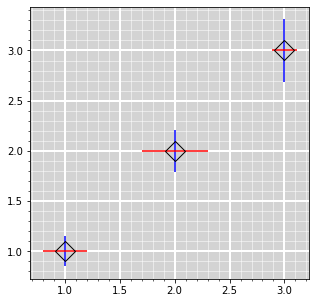

In [184]:
# some of the functionality that is demonstrated in scatter_13.ncl
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y, marker='D', markersize=14, mec='k', mfc='none', linestyle='none')
ax.errorbar(x, y, yerr=u2, xerr=None, linestyle='none', ecolor='blue' )
ax.errorbar(x, y, yerr=None, xerr=u1, linestyle='none', ecolor='red')
ax.set_facecolor('lightgray')
ax.minorticks_on()
ax.grid(b=True, which='major', axis='both', color='white', linewidth=2)
ax.grid(b=True, which='minor', axis='both', color='white', linewidth=.5)

In [181]:
# I couldn't remember how to turn on minor ticks,
# so I just searched for minor in all the ax methods
for i in dir(ax):
    if 'minor' in i:
        print(i)

get_xminorticklabels
get_yminorticklabels
minorticks_off
minorticks_on
